In [0]:
## Reading libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import warnings
from sklearn import metrics
from sklearn.metrics import mean_squared_error,log_loss
from sklearn.model_selection import KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import lightgbm as lgb
from xgboost import XGBRegressor
import requests
from io import StringIO 
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# !pip install datasist
# Google drive links to shared submission and training datasets
#
submission = 'https://drive.google.com/file/d/1oZEf3hLwMKWCrVPlQIPtBmuOsaZpwQti/view?usp=sharing'
train = 'https://drive.google.com/file/d/1ezXTArPnr6jzvqjAy2YiMyvlw3FSmlZm/view?usp=sharing'
test  = "https://drive.google.com/file/d/1JR0Qq0QtAg2EGZIdVDy1wwmU_s8iXjFs/view?usp=sharing"
# Creating a function to read a csv file shared via google
#
def read_csv(url):
  url = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
  csv_raw = requests.get(url).text
  csv = StringIO(csv_raw)
  df = pd.read_csv(csv)
  return df

# Creating submission and training datataframes
#

In [0]:
sample_sub = read_csv(submission)
train = read_csv(train)
test  = read_csv(test)

In [0]:
from datetime import datetime

train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [0]:
train.target.min(),train.target.max()

(1.0, 815.0)

In [0]:
train.Date

0       2020-01-02
1       2020-01-03
2       2020-01-04
3       2020-01-05
4       2020-01-06
           ...    
30552   2020-03-15
30553   2020-03-16
30554   2020-03-17
30555   2020-03-18
30556   2020-03-19
Name: Date, Length: 30557, dtype: datetime64[ns]

In [0]:
def time_series(start, end):
    time_series_df = train[['Date', 'target']][(train['Date'] >= start) & (train['Date'] <= end)]
    x = time_series_df.Date
    y = time_series_df.target
    plt.plot(x,y)
    plt.xlabel('Time')
    plt.ylabel('PM2.5 Value')
    plt.title('PM2.5 Time Series')
    return plt.show();

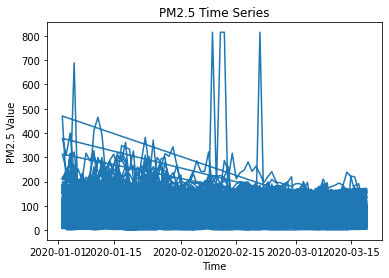

In [0]:
time_series('2020-01-02','2020-03-19')


In [0]:
train =  train[train.target <= 600]


In [0]:
train["month"] =  train.Date.dt.month

test["month"] =  test.Date.dt.month


In [0]:
##drop12check
train["t"] = train.temperature_2m_above_ground.shift(periods  = -1)

train["t_1"] = train.temperature_2m_above_ground.shift(periods  = 1)
train["t_2"] = train.temperature_2m_above_ground.shift(periods  = 2)
train["t_3"] = train.temperature_2m_above_ground.shift(periods  = 3)
train["t_4"] = train.temperature_2m_above_ground.shift(periods  = 4)
train["t_5"] = train.temperature_2m_above_ground.shift(periods  = 5)

test["t"] = test.temperature_2m_above_ground.shift(periods  = -1)
test["t_1"] = test.temperature_2m_above_ground.shift(periods  = 1)
test["t_2"] = test.temperature_2m_above_ground.shift(periods  = 2)
test["t_3"] = test.temperature_2m_above_ground.shift(periods  = 3)
test["t_4"] = test.temperature_2m_above_ground.shift(periods  = 4)
test["t_5"] = test.temperature_2m_above_ground.shift(periods  = 5)

In [0]:
# new fe

train["l_1"] = train.L3_O3_O3_effective_temperature.shift(periods  = 1)
train["l_2"] = train.L3_O3_O3_effective_temperature.shift(periods  = 2)
train["l_3"] = train.L3_O3_O3_effective_temperature.shift(periods  = 3)
train["l_4"] = train.L3_O3_O3_effective_temperature.shift(periods  = 4)
train["l_5"] = train.L3_O3_O3_effective_temperature.shift(periods  = 5)


test["l_1"] = test.L3_O3_O3_effective_temperature.shift(periods  = 1)
test["l_2"] = test.L3_O3_O3_effective_temperature.shift(periods  = 2)
test["l_3"] = test.L3_O3_O3_effective_temperature.shift(periods  = 3)
test["l_4"] = test.L3_O3_O3_effective_temperature.shift(periods  = 4)
test["l_5"] = test.L3_O3_O3_effective_temperature.shift(periods  = 5)

In [0]:
# fe part 2
train["n_1"] = train.L3_NO2_NO2_column_number_density.shift(periods  = 1)
train["n_2"] = train.L3_NO2_NO2_column_number_density.shift(periods  = 2)
train["n_3"] = train.L3_NO2_NO2_column_number_density.shift(periods  = 3)
train["n_4"] = train.L3_NO2_NO2_column_number_density.shift(periods  = 4)
train["n_5"] = train.L3_NO2_NO2_column_number_density.shift(periods  = 5)


test["n_1"] = test.L3_NO2_NO2_column_number_density.shift(periods  = 1)
test["n_2"] = test.L3_NO2_NO2_column_number_density.shift(periods  = 2)
test["n_3"] = test.L3_NO2_NO2_column_number_density.shift(periods  = 3)
test["n_4"] = test.L3_NO2_NO2_column_number_density.shift(periods  = 4)
test["n_5"] = test.L3_NO2_NO2_column_number_density.shift(periods  = 5)



In [0]:
# fe part 3
train["s_1"] = train.L3_NO2_NO2_slant_column_number_density.shift(periods  = 1)
train["s_2"] = train.L3_NO2_NO2_slant_column_number_density.shift(periods  = 2)
train["s_3"] = train.L3_NO2_NO2_slant_column_number_density.shift(periods  = 3)
train["s_4"] = train.L3_NO2_NO2_slant_column_number_density.shift(periods  = 4)
train["s_5"] = train.L3_NO2_NO2_slant_column_number_density.shift(periods  = 5)


test["s_1"] = test.L3_NO2_NO2_slant_column_number_density.shift(periods  = 1)
test["s_2"] = test.L3_NO2_NO2_slant_column_number_density.shift(periods  = 2)
test["s_3"] = test.L3_NO2_NO2_slant_column_number_density.shift(periods  = 3)
test["s_4"] = test.L3_NO2_NO2_slant_column_number_density.shift(periods  = 4)
test["s_5"] = test.L3_NO2_NO2_slant_column_number_density.shift(periods  = 5)



In [0]:
# fe after 31.362
train["p_1"] = train.L3_CLOUD_cloud_base_pressure.shift(periods  = 1)
train["p_2"] = train.L3_CLOUD_cloud_base_pressure.shift(periods  = 2)
train["p_3"] = train.L3_CLOUD_cloud_base_pressure.shift(periods  = 3)
train["p_4"] = train.L3_CLOUD_cloud_base_pressure.shift(periods  = 4)
train["p_5"] = train.L3_CLOUD_cloud_base_pressure.shift(periods  = 5)


test["p_1"] = test.L3_CLOUD_cloud_base_pressure.shift(periods  = 1)
test["p_2"] = test.L3_CLOUD_cloud_base_pressure.shift(periods  = 2)
test["p_3"] = test.L3_CLOUD_cloud_base_pressure.shift(periods  = 3)
test["p_4"] = test.L3_CLOUD_cloud_base_pressure.shift(periods  = 4)
test["p_5"] = test.L3_CLOUD_cloud_base_pressure.shift(periods  = 5)


In [0]:
# #########################################new plenty
train["y_1"] = train.L3_SO2_SO2_slant_column_number_density.shift(periods  = 1)
train["y_2"] = train.L3_SO2_SO2_slant_column_number_density.shift(periods  = 2)
train["y_3"] = train.L3_SO2_SO2_slant_column_number_density.shift(periods  = 3)
train["y_4"] = train.L3_SO2_SO2_slant_column_number_density.shift(periods  = 4)
train["y_5"] = train.L3_SO2_SO2_slant_column_number_density.shift(periods  = 5)


test["y_1"] = test.L3_SO2_SO2_slant_column_number_density.shift(periods  = 1)
test["y_2"] = test.L3_SO2_SO2_slant_column_number_density.shift(periods  = 2)
test["y_3"] = test.L3_SO2_SO2_slant_column_number_density.shift(periods  = 3)
test["y_4"] = test.L3_SO2_SO2_slant_column_number_density.shift(periods  = 4)
test["y_5"] = test.L3_SO2_SO2_slant_column_number_density.shift(periods  = 5)


# train["z_1"] = train.L3_SO2_SO2_column_number_density_amf.shift(periods  = 1)
# train["z_2"] = train.L3_SO2_SO2_column_number_density_amf.shift(periods  = 2)
# train["z_3"] = train.L3_SO2_SO2_column_number_density_amf.shift(periods  = 3)
# train["z_4"] = train.L3_SO2_SO2_column_number_density_amf.shift(periods  = 4)
# train["z_5"] = train.L3_SO2_SO2_column_number_density_amf.shift(periods  = 5)


# test["z_1"] = test.L3_SO2_SO2_column_number_density_amf.shift(periods  = 1)
# test["z_2"] = test.L3_SO2_SO2_column_number_density_amf.shift(periods  = 2)
# test["z_3"] = test.L3_SO2_SO2_column_number_density_amf.shift(periods  = 3)
# test["z_4"] = test.L3_SO2_SO2_column_number_density_amf.shift(periods  = 4)
# test["z_5"] = test.L3_SO2_SO2_column_number_density_amf.shift(periods  = 5)



train["z_1"] = train.L3_HCHO_tropospheric_HCHO_column_number_density.shift(periods  = 1)
train["z_2"] = train.L3_HCHO_tropospheric_HCHO_column_number_density.shift(periods  = 2)
train["z_3"] = train.L3_HCHO_tropospheric_HCHO_column_number_density.shift(periods  = 3)
train["z_4"] = train.L3_HCHO_tropospheric_HCHO_column_number_density.shift(periods  = 4)
train["z_5"] = train.L3_HCHO_tropospheric_HCHO_column_number_density.shift(periods  = 5)


test["z_1"] = test.L3_HCHO_tropospheric_HCHO_column_number_density.shift(periods  = 1)
test["z_2"] = test.L3_HCHO_tropospheric_HCHO_column_number_density.shift(periods  = 2)
test["z_3"] = test.L3_HCHO_tropospheric_HCHO_column_number_density.shift(periods  = 3)
test["z_4"] = test.L3_HCHO_tropospheric_HCHO_column_number_density.shift(periods  = 4)
test["z_5"] = test.L3_HCHO_tropospheric_HCHO_column_number_density.shift(periods  = 5)

In [0]:
#######################newest1


train["c_1"] = train.L3_CO_CO_column_number_density.shift(periods  = 1)
train["c_2"] = train.L3_CO_CO_column_number_density.shift(periods  = 2)
train["c_3"] = train.L3_CO_CO_column_number_density.shift(periods  = 3)
train["c_4"] = train.L3_CO_CO_column_number_density.shift(periods  = 4)
train["c_5"] = train.L3_CO_CO_column_number_density.shift(periods  = 5)


test["c_1"] = test.L3_CO_CO_column_number_density.shift(periods  = 1)
test["c_2"] = test.L3_CO_CO_column_number_density.shift(periods  = 2)
test["c_3"] = test.L3_CO_CO_column_number_density.shift(periods  = 3)
test["c_4"] = test.L3_CO_CO_column_number_density.shift(periods  = 4)
test["c_5"] = test.L3_CO_CO_column_number_density.shift(periods  = 5)

In [0]:
# newest2
train["a_1"] = train.L3_NO2_tropopause_pressure.shift(periods  = 1)
train["a_2"] = train.L3_NO2_tropopause_pressure.shift(periods  = 2)
train["a_3"] = train.L3_NO2_tropopause_pressure.shift(periods  = 3)
train["a_4"] = train.L3_NO2_tropopause_pressure.shift(periods  = 4)
train["a_5"] = train.L3_NO2_tropopause_pressure.shift(periods  = 5)


test["a_1"] = test.L3_NO2_tropopause_pressure.shift(periods  = 1)
test["a_2"] = test.L3_NO2_tropopause_pressure.shift(periods  = 2)
test["a_3"] = test.L3_NO2_tropopause_pressure.shift(periods  = 3)
test["a_4"] = test.L3_NO2_tropopause_pressure.shift(periods  = 4)
test["a_5"] = test.L3_NO2_tropopause_pressure.shift(periods  = 5)

In [0]:
# from begnew
train["d_1"] = train.precipitable_water_entire_atmosphere.shift(periods  = 1)
train["d_2"] = train.precipitable_water_entire_atmosphere.shift(periods  = 2)
train["d_3"] = train.precipitable_water_entire_atmosphere.shift(periods  = 3)
train["d_4"] = train.precipitable_water_entire_atmosphere.shift(periods  = 4)
train["d_5"] = train.precipitable_water_entire_atmosphere.shift(periods  = 5)


test["d_1"] = test.precipitable_water_entire_atmosphere.shift(periods  = 1)
test["d_2"] = test.precipitable_water_entire_atmosphere.shift(periods  = 2)
test["d_3"] = test.precipitable_water_entire_atmosphere.shift(periods  = 3)
test["d_4"] = test.precipitable_water_entire_atmosphere.shift(periods  = 4)
test["d_5"] = test.precipitable_water_entire_atmosphere.shift(periods  = 5)

In [0]:
# # trying sensor altitude
# train["f_1"] = train.L3_CLOUD_cloud_optical_depth.shift(periods  = 1)
# train["f_2"] = train.L3_CLOUD_cloud_optical_depth.shift(periods  = 2)
# train["f_3"] = train.L3_CLOUD_cloud_optical_depth.shift(periods  = 3)
# train["f_4"] = train.L3_CLOUD_cloud_optical_depth.shift(periods  = 4)
# train["f_5"] = train.L3_CLOUD_cloud_optical_depth.shift(periods  = 5)


# test["f_1"] = test.L3_CLOUD_cloud_optical_depth.shift(periods  = 1)
# test["f_2"] = test.L3_CLOUD_cloud_optical_depth.shift(periods  = 2)
# test["f_3"] = test.L3_CLOUD_cloud_optical_depth.shift(periods  = 3)
# test["f_4"] = test.L3_CLOUD_cloud_optical_depth.shift(periods  = 4)
# test["f_5"] = test.L3_CLOUD_cloud_optical_depth.shift(periods  = 5)


# trying sensor altitude
train["f_1"] = train.L3_CO_CO_column_number_density.shift(periods  = -1)
train["f_2"] = train.L3_CO_CO_column_number_density.shift(periods  = -2)
train["f_3"] = train.L3_CO_CO_column_number_density.shift(periods  = -3)
train["f_4"] = train.L3_CO_CO_column_number_density.shift(periods  = -4)
train["f_5"] = train.L3_CO_CO_column_number_density.shift(periods  = -5)


test["f_1"] = test.L3_CO_CO_column_number_density.shift(periods  = -1)
test["f_2"] = test.L3_CO_CO_column_number_density.shift(periods  = -2)
test["f_3"] = test.L3_CO_CO_column_number_density.shift(periods  = -3)
test["f_4"] = test.L3_CO_CO_column_number_density.shift(periods  = -4)
test["f_5"] = test.L3_CO_CO_column_number_density.shift(periods  = -5)


In [0]:
####################
# reverse
train["g_1"] = train.L3_HCHO_tropospheric_HCHO_column_number_density.shift(periods  = -1)
train["g_2"] = train.L3_HCHO_tropospheric_HCHO_column_number_density.shift(periods  = -2)
train["g_3"] = train.L3_HCHO_tropospheric_HCHO_column_number_density.shift(periods  = -3)
train["g_4"] = train.L3_HCHO_tropospheric_HCHO_column_number_density.shift(periods  = -4)
train["g_5"] = train.L3_HCHO_tropospheric_HCHO_column_number_density.shift(periods  = -5)


test["g_1"] = test.L3_HCHO_tropospheric_HCHO_column_number_density.shift(periods  = -1)
test["g_2"] = test.L3_HCHO_tropospheric_HCHO_column_number_density.shift(periods  = -2)
test["g_3"] = test.L3_HCHO_tropospheric_HCHO_column_number_density.shift(periods  = -3)
test["g_4"] = test.L3_HCHO_tropospheric_HCHO_column_number_density.shift(periods  = -4)
test["g_5"] = test.L3_HCHO_tropospheric_HCHO_column_number_density.shift(periods  = -5)


In [0]:
train['temperature_2m_above_ground'] = (train.temperature_2m_above_ground - 32) * 5.0/9.0
train['t_1'] = (train.t_1 - 32) * 5.0/9.0

test['temperature_2m_above_ground'] = (test.temperature_2m_above_ground - 32) * 5.0/9.0
test['t_1'] = (test.t_1 - 32) * 5.0/9.0


In [0]:
train['day_week'] = train['Date'].dt.weekday

test['day_week'] = test['Date'].dt.weekday



In [0]:
train["day"] = train.Date.dt.day
test["day"] = test.Date.dt.day

In [0]:
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si


In [0]:
train['si']=train['L3_SO2_cloud_fraction'].apply(calculate_si)
test['si']=test['L3_SO2_cloud_fraction'].apply(calculate_si)


In [0]:
y = train['target']
X = train.drop(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count'],axis  =1)

In [0]:
!pip install catboost

In [0]:
from catboost import CatBoostRegressor
errcb2=[]
y_pred_totcb2=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
fold=KFold(n_splits=10)#15#5#10
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  
    m2  = CatBoostRegressor(   n_estimators=3000,eval_metric='RMSE',learning_rate=0.1, random_seed= 1234, use_best_model=True )
    m2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=200,verbose=100,)#erly100
    preds=m2.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,preds)))
    errcb2.append(np.sqrt(mean_squared_error(y_test,preds)))
    p2 = m2.predict(test.drop(['Place_ID X Date', 'Date', 'Place_ID'],axis =1))
    y_pred_totcb2.append(p2)
np.mean(errcb2)

0:	learn: 45.1506196	test: 45.1506196	test1: 37.9447709	best: 37.9447709 (0)	total: 97.3ms	remaining: 4m 51s
100:	learn: 28.0226849	test: 28.0226849	test1: 25.9587136	best: 25.9465221 (99)	total: 4.4s	remaining: 2m 6s
200:	learn: 24.8716877	test: 24.8716877	test1: 25.3704562	best: 25.3193546 (198)	total: 8.77s	remaining: 2m 2s
300:	learn: 22.7966194	test: 22.7966194	test1: 24.9099017	best: 24.9099017 (300)	total: 13.1s	remaining: 1m 57s
400:	learn: 21.1897253	test: 21.1897253	test1: 24.5825739	best: 24.5797264 (399)	total: 17.4s	remaining: 1m 52s
500:	learn: 19.9433721	test: 19.9433721	test1: 24.3967377	best: 24.3746635 (476)	total: 21.7s	remaining: 1m 48s
600:	learn: 18.8083920	test: 18.8083920	test1: 24.2529018	best: 24.2288976 (591)	total: 26s	remaining: 1m 43s
700:	learn: 17.8216231	test: 17.8216231	test1: 24.0536105	best: 24.0536105 (700)	total: 30.4s	remaining: 1m 39s
800:	learn: 17.0058994	test: 17.0058994	test1: 23.8591552	best: 23.8580568 (793)	total: 34.7s	remaining: 1m 35s
9

26.97027237105908

In [0]:
np.mean(errcb2)

26.97027237105908

In [0]:
test_id  = test['Place_ID X Date']

In [0]:
d = {'Place_ID X Date': test_id, 'target': np.mean(y_pred_totcb2, 0)}
sub = pd.DataFrame(data=d)
sub = sub[['Place_ID X Date', 'target']]

In [0]:
#sub.target = np.abs(sub.target)

In [0]:
sub.target.min(),sub.target.max()

(-5.2409165065351395, 258.41638695746985)

In [0]:
sub.to_csv("newest.csv",index  = False)

In [0]:
from google.colab import files

In [0]:
files.download("newest.csv")